## Predicting Pulsars: Mean, Standard Deviation and Kurtosis Analysis

**Logan Chan, Sam Donato, Navneet Bedi, Ahadjon Sultonov**

### Introduction

Pulsars were first discovered in 1967 by astronomers Jocelyn Bell Burnell and Antony Hewish (American Physical Society, 2006). 

A pulsar is a rotating neutron star that is highly magnetized, causing them to emit beams of radiation. These stars provided the first indirect evidence for the existence of gravitational waves. Pulsar stars also have the potential to reveal extreme phenomena in neutron star astrophysics (Zhang et al., 2020. 

Thus, in effect, pulsars can be thought of as 'cosmic lighthouses.'

These beams can appear to pulse as the star rotates, but other astronomical phenomena in space can mimic these pulsar signals, which we call spurious signals. The spurious signals can be challenging to identify and seperate from pulsar signals (Gaskill, 2020). 

The goal of this project will be to use variables from the HTRU2 UC Irvine Machine Learning Repository Pulsar Star Dataset to classify whether a star is pulsar or not.

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South). The data set shared contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples (Lyon, 2017).  In the data set, legitimate pulsar examples are a minority positive class, and spurious examples are the majority negative class. The class labels used are 0 (negative) and 1 (positive). Due to the number of predictor variables, we only chose a few potentially important predictors to focus on for the preliminary analysis.

The question we will be addressing is: **Given the mean, standard deviation, and excess kurtosis of the integrated profile, can we predict if a star is pulsar or if it is a spurious signal?**

### Methods and Results

We are using the HTRU_2.csv data from the UC Irvine Machine Learning Repository Pulsar Star Dataset to predict if a star is a pulsar or a spurious signal. The columns are as follows:

1. **mean_ip**: Mean of the integrated profile,
2. **std_dev_ip**: Standard deviation of the integrated profile,
3. **kurtosis_ip**: Excess kurtosis of the integrated profile,
4. **type**: Type of a star ( 0 = **spurious signal**, 1 = **pulsar**)  

#### 1. Loading the Data

In [6]:
## Load libraries
library(tidyverse)
library(repr)
library(tidymodels)

set.seed(18)

## Download dataset from the internet
url <- "https://raw.githubusercontent.com/loganchan26/DSCI-100-project-group10-18/03a96760928865bfb961dc8ea308d3b129a82baf/HTRU_2.csv"
download.file(url, "data/pulsar_data.csv")
pulsar_data <- read_csv("data/pulsar_data.csv")

Rows: 17897 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (9): 140.5625, 55.68378214, -0.234571412, -0.699648398, 3.199832776, 19....

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


There are 17,897 rows with no missing data.

#### 2. Cleaning and Wrangling the Data

To clean the data, we will assign names to each of the initial 9 columns using the `colnames()` function. Next, we will select the `mean_ip`, `std_dev_ip`, `kurtosis_ip`, and `type` columns that we will use for data analysis. 

In [7]:
## rename columns and select columns of interest (convert type into pulsar/spurious?)
colnames(pulsar_data) <- c("mean_ip", "std_dev_ip", "kurtosis_ip", "skew_ip", "mean_curve", "std_dev_curve", "kurtosis_curve", "skew_curve", "type") 
pulsar_data_selected <- pulsar_data |> select("mean_ip", "std_dev_ip", "kurtosis_ip", "type")
glimpse(pulsar_data_selected)

Rows: 17,897
Columns: 4
$ mean_ip     <dbl> 102.50781, 103.01562, 136.75000, 88.72656, 93.57031, 119.4…
$ std_dev_ip  <dbl> 58.88243, 39.34165, 57.17845, 40.67223, 46.69811, 48.76506…
$ kurtosis_ip <dbl> 0.46531815, 0.32332837, -0.06841464, 0.60086608, 0.5319048…
$ type        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0…


#### 3. Splitting and Summarizing the Data

To classify whether a star is a pulsar or spurious signal, we will be using the K-nearest neighbors classification algorithm. We used `initial_split()` to split our data frame into 75% training and 25% testing data, stratifying for `type`. We will only use the training set for analysis.

In [9]:
## split set into training and testing
pulsar_split <- initial_split(pulsar_data_selected, prop = 0.75, strata = type)
pulsar_training <- training(pulsar_split)
pulsar_testing  <- testing(pulsar_split)

We will use **Tables** to visualize the number of observations of each type (type 0 = RFI/noise, type 1 = pulsar star) and the average values of each variable (mean of integrated profile, standard deviation of integrated profile, and excess kurtosis of the integrated profile). 

In [10]:
##summarize data into table(s) - mean values of each variable, number of each observation
mean_vars <- pulsar_training |>
            mutate(avg_mean_ip = mean(mean_ip)) |>
            mutate(avg_std_dev_ip = mean(std_dev_ip)) |>
            mutate(avg_kurtosis_ip = mean(kurtosis_ip)) |>
            select("avg_mean_ip", "avg_std_dev_ip", "avg_kurtosis_ip") |>
            slice(1)
mean_vars

#number of each observation
num_observations <- pulsar_training |>
                    group_by(type) |>
                    summarize(count = n())
num_observations

avg_mean_ip,avg_std_dev_ip,avg_kurtosis_ip
<dbl>,<dbl>,<dbl>
111.2074,46.56081,0.4742938


type,count
<dbl>,<int>
0,12189
1,1233


We will use **Histograms** to visualize the distribution of `Standard deviation of the integrated profile`, `Mean of the integrated profile`, and `Excess kurtosis of the integrated profile`.

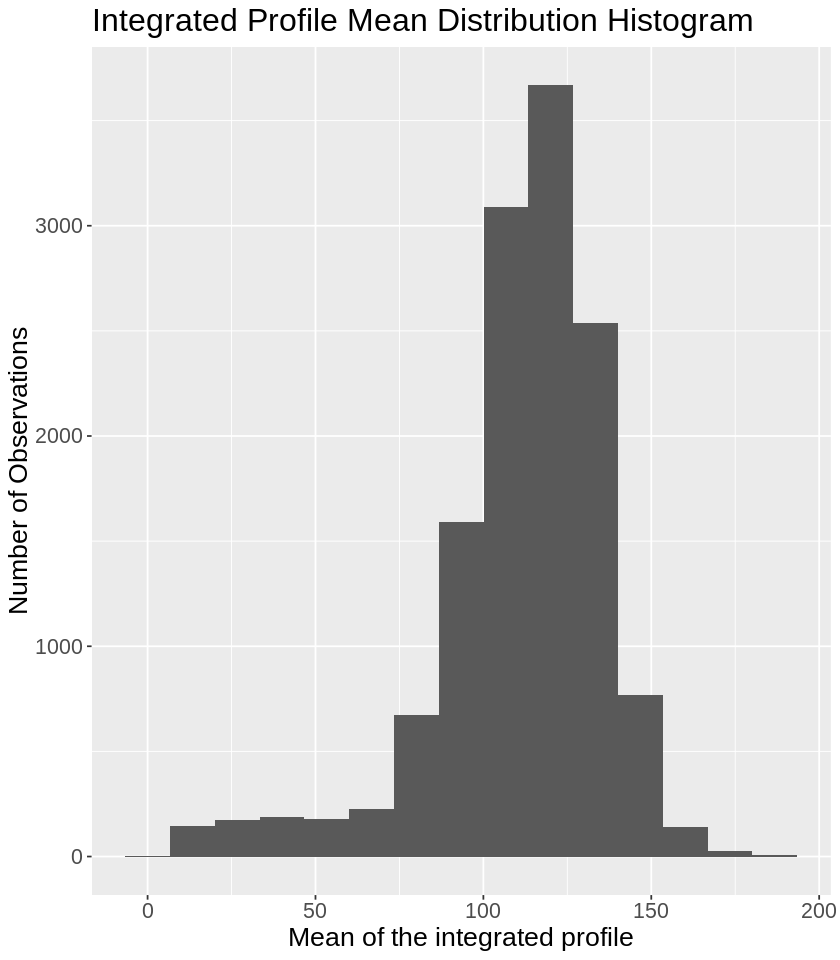

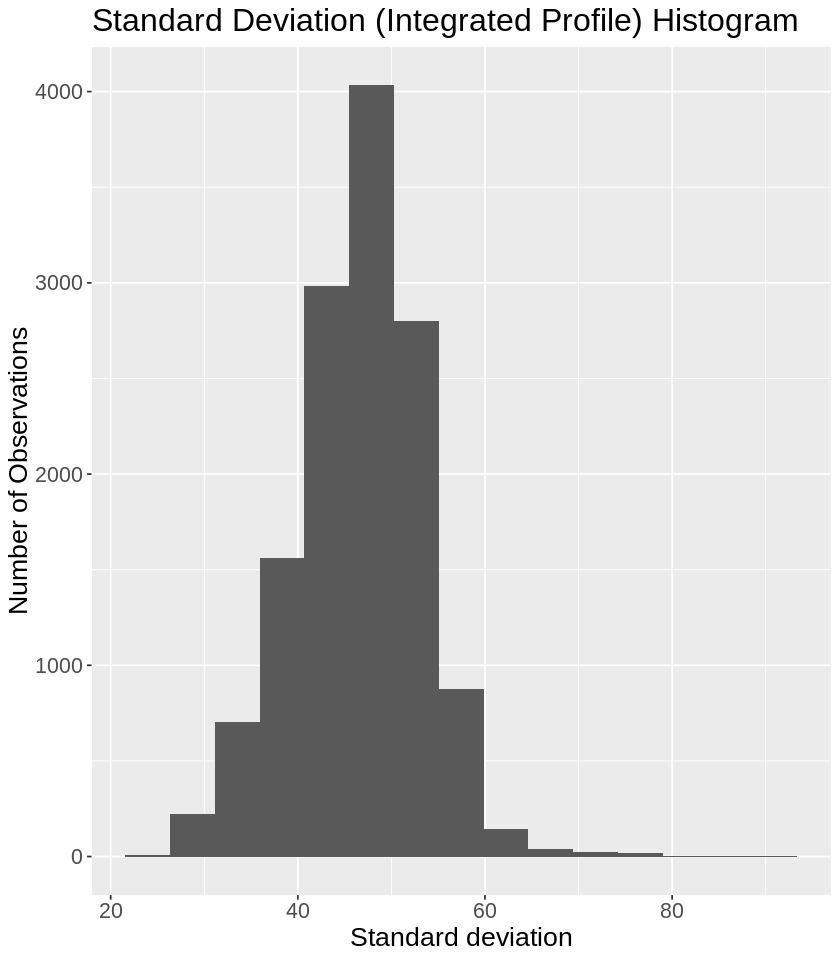

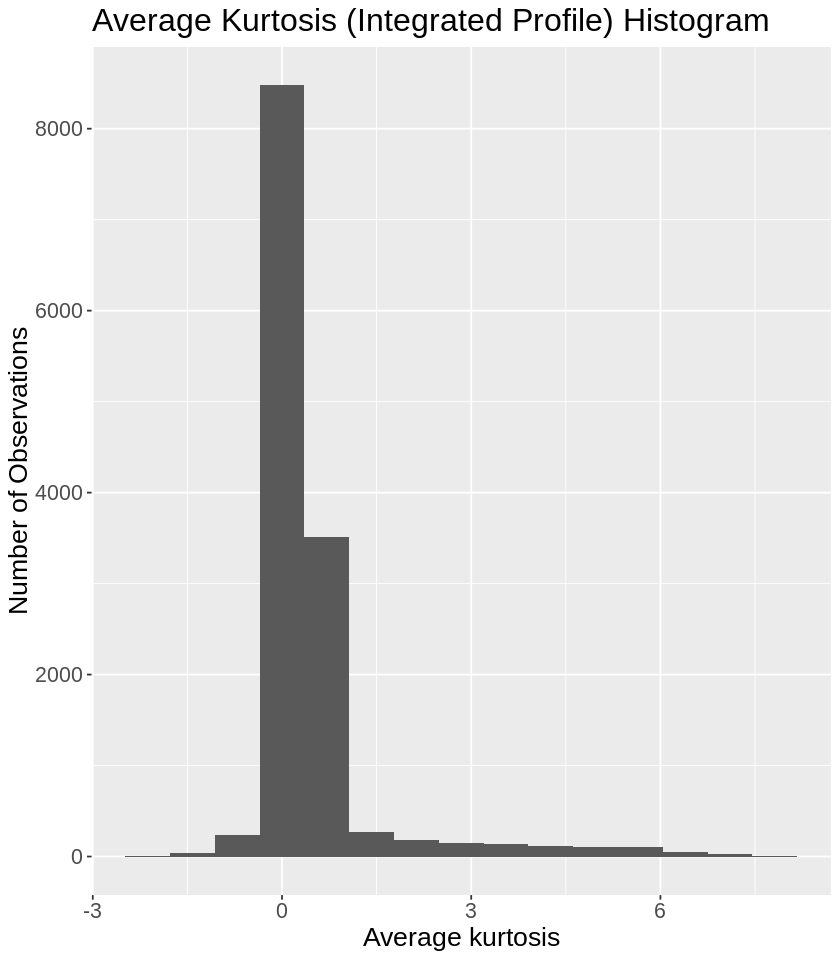

In [12]:
## visualize data into scatterplot - distribution of each variable
options(repr.plot.width = 7, repr.plot.height = 8)

# mean_ip histogram
mean_ip_histogram <- pulsar_training |>
    ggplot(aes(x = mean_ip)) +
        geom_histogram(bins = 15) +
        labs(x = "Mean of the integrated profile", y = "Number of Observations") +
        ggtitle("Integrated Profile Mean Distribution Histogram") +
        theme(text = element_text(size = 16))
mean_ip_histogram

# std_dev histogram
std_dev_histogram <- pulsar_training |>
    ggplot(aes(x = std_dev_ip)) +
        geom_histogram(bins = 15) +
        labs(x = "Standard deviation", y = "Number of Observations") +
        ggtitle("Standard Deviation (Integrated Profile) Histogram") +
        theme(text = element_text(size = 16))
std_dev_histogram

# avg_kurtosis histogram
avg_kurtosis_histogram <- pulsar_training |>
    ggplot(aes(x = kurtosis_ip)) +
        geom_histogram(bins = 15) +
        labs(x = "Average kurtosis", y = "Number of Observations") +
        ggtitle("Average Kurtosis (Integrated Profile) Histogram") +
        theme(text = element_text(size = 16))
avg_kurtosis_histogram

#### 4. Tuning the classifier

In [ ]:
# create the standardization recipe from before based on the training data
pulsar_recipe <- recipe(type ~ mean_ip + std_dev_ip + kurtosis_ip, data = pulsar_training) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())


#create a knn model 

# fit the knn model (we can reuse the old knn_spec model from before)
knn_fit <- workflow() |>
  add_recipe(cancer_recipe) |>
  add_model(knn_spec) |>
  fit(data = cancer_subtrain)

# get predictions on the validation data
validation_predicted <- predict(knn_fit, cancer_validation) |>
  bind_cols(cancer_validation)

# compute the accuracy
acc <- validation_predicted |>
  metrics(truth = Class, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  select(.estimate) |>
  pull()

acc

### Discussion

asdfghj

### References

asdfg